In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 6)

# optional - confirm package import path
import sys, pathlib
print("CWD:", pathlib.Path().resolve())
print("Python:", sys.executable)



CWD: /Users/brain/code/kf_lab/notebooks
Python: /Users/brain/code/kf_lab/.venv/bin/python


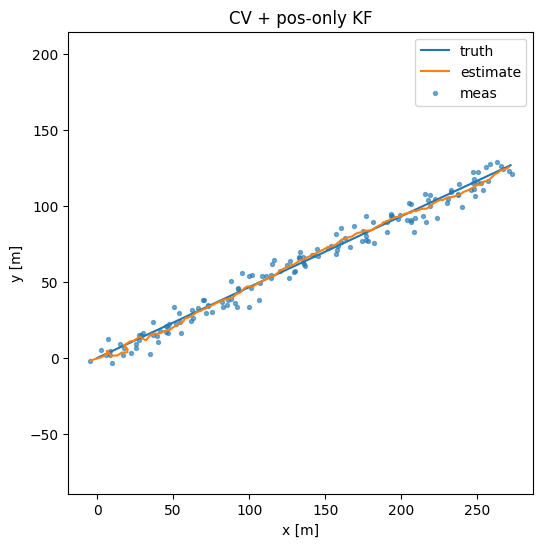

Run summary: {'rmse_px': 1.4947008612768977, 'rmse_py': 1.5916991996438956, 'rmse_pos': 2.1834919296505126, 'rmse_vx': 0.8146186116213845, 'rmse_vy': 0.71247402120381, 'rmse_vel': 1.0822304344686853, 'mean_nees': 2.1244149372750964, 'mean_nis': 1.8086487211144464, 'N': 151}
Saved to: /Users/brain/code/kf_lab/notebooks/runs/cv_posonly_20251028_143637


({'rmse_px': 1.4947008612768977,
  'rmse_py': 1.5916991996438956,
  'rmse_pos': 2.1834919296505126,
  'rmse_vx': 0.8146186116213845,
  'rmse_vy': 0.71247402120381,
  'rmse_vel': 1.0822304344686853,
  'mean_nees': 2.1244149372750964,
  'mean_nis': 1.8086487211144464,
  'N': 151},
 PosixPath('runs/cv_posonly_20251028_143637'))

In [2]:
from kf_lab.experiments.run_once import run_once

summary, out_dir = run_once(
    duration_s=30.0,
    truth_dt=0.01,
    v0=10.0,
    heading_deg=25.0,
    sensor_hz=5.0,
    q_process=0.2,
    sigma_px=5.0,
    sigma_py=5.0,
    P0_diag=[100,100,100,100],
    seed=123,
    save_plots=True,
)
summary, out_dir



In [3]:
import numpy as np
truth = np.load(out_dir / "truth.npy")
est   = np.load(out_dir / "est.npy")
meas  = np.load(out_dir / "meas.npy")

truth.shape, est.shape, meas.shape


((151, 4), (151, 4), (151, 2))

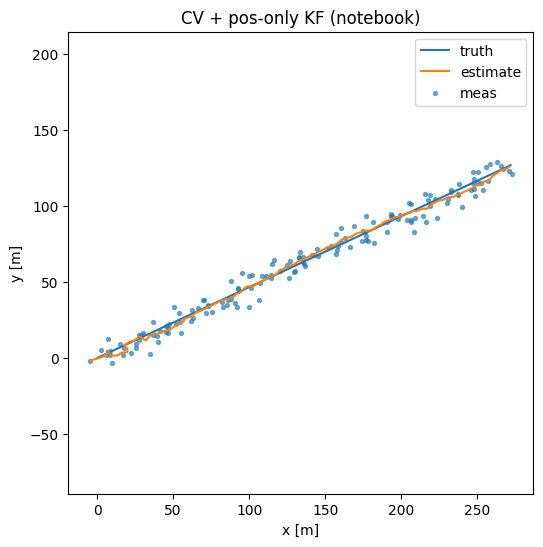

In [4]:
from kf_lab.viz.plots import plot_xy
plot_xy(truth, est, meas, title="CV + pos-only KF (notebook)")


In [6]:
rows = []
for noise in [2.0, 5.0, 10.0]:
    for q in [0.05, 0.2, 0.5]:
        s, _ = run_once(
            duration_s=25.0,
            v0=10.0,
            heading_deg=25.0,
            sensor_hz=5.0,
            q_process=q,
            sigma_px=noise, sigma_py=noise,
            save_plots=False,
            seed=42,
        )
        rows.append({"sigma": noise, "q": q, **s})

import pandas as pd
df = pd.DataFrame(rows)
df.sort_values(["sigma","q"])


Run summary: {'rmse_px': 0.6356022763327172, 'rmse_py': 0.49838658545902265, 'rmse_pos': 0.8077000942458997, 'rmse_vx': 0.757894582423304, 'rmse_vy': 0.6557283520204983, 'rmse_vel': 1.0021895378171302, 'mean_nees': 1.2939122764561344, 'mean_nis': 1.7319727676989498, 'N': 126}
Saved to: /Users/brain/code/kf_lab/notebooks/runs/cv_posonly_20251028_144122
Run summary: {'rmse_px': 0.673619915935302, 'rmse_py': 0.5488168790896037, 'rmse_pos': 0.8688865046243589, 'rmse_vx': 0.7654509125182222, 'rmse_vy': 0.6629868152656602, 'rmse_vel': 1.0126532559030663, 'mean_nees': 1.2612231156711071, 'mean_nis': 1.7159551189056708, 'N': 126}
Saved to: /Users/brain/code/kf_lab/notebooks/runs/cv_posonly_20251028_144122
Run summary: {'rmse_px': 0.7119479419925313, 'rmse_py': 0.5831767439113315, 'rmse_pos': 0.9203070067898123, 'rmse_vx': 0.7781423913337263, 'rmse_vy': 0.6739291610597906, 'rmse_vel': 1.0294105572206471, 'mean_nees': 1.2208378728570042, 'mean_nis': 1.7035698082070327, 'N': 126}
Saved to: /Users

,sigma,q,rmse_px,rmse_py,rmse_pos,rmse_vx,rmse_vy,rmse_vel,mean_nees,mean_nis,N
0,2.0,0.05,0.635602,0.498387,0.807700,0.757895,0.655728,1.002190,1.293912,1.731973,126
1,2.0,0.20,0.673620,0.548817,0.868887,0.765451,0.662987,1.012653,1.261223,1.715955,126
2,2.0,0.50,0.711948,0.583177,0.920307,0.778142,0.673929,1.029411,1.220838,1.703570,126
3,5.0,0.05,1.462954,1.076538,1.816361,0.875915,0.666143,1.100442,1.347724,1.742904,126
4,5.0,0.20,1.478458,1.153285,1.875075,0.882609,0.674337,1.110734,1.281920,1.734986,126
5,5.0,0.50,1.523906,1.232929,1.960205,0.897020,0.690397,1.131942,1.264706,1.726213,126
6,10.0,0.05,2.788871,1.905439,3.377647,1.002949,0.786406,1.274496,1.386296,1.746069,126
7,10.0,0.20,2.764627,1.972898,3.396393,1.005531,0.792890,1.280534,1.293067,1.742801,126
8,10.0,0.50,2.777301,2.071287,3.464626,1.016909,0.807109,1.298279,1.248559,1.738370,126
